In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
adv_data = pd.read_csv('advertising.csv')
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
adv_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## EDA

<AxesSubplot:ylabel='Density'>

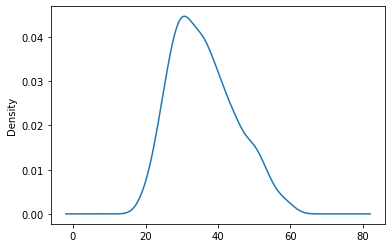

In [5]:
adv_data['Age'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

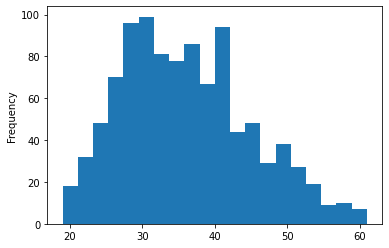

In [7]:
adv_data['Age'].plot(kind='hist',bins=20)

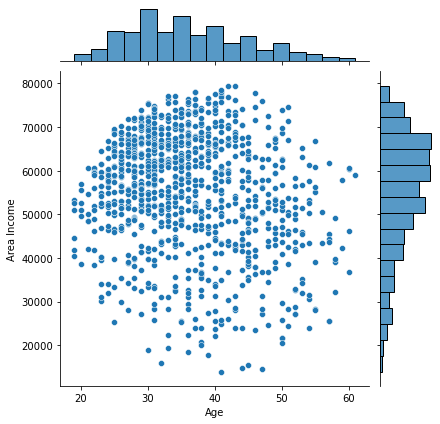

In [9]:
sns.jointplot(data=adv_data,x='Age',y='Area Income')

In [10]:
adv_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

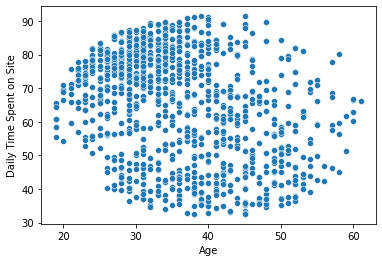

In [11]:
sns.scatterplot(data=adv_data,x='Age',y='Daily Time Spent on Site')

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

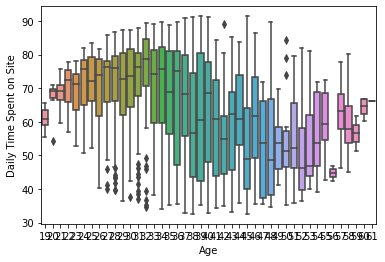

In [12]:
sns.boxplot(data=adv_data,x='Age',y='Daily Time Spent on Site')

In [13]:
adv_data['City'].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

In [14]:
adv_data['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [18]:
adv_data['City'].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', 'Jamieberg', 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'East Theresashire',
       'West Katiefurt', 'North Tara', 'West William', 'New Travistown',
       'West Dylanberg', 'Pruittmouth', 'Jessicastad', 'Millertown',
       'Port Jacqueline', 'Lake Nicole', 'South John', 'Pamelamouth',
       'Harperborough', 'Port Danielleberg', 'West Jeremyside',
       'South Cathyfurt', 'Palmerside', 'West Guybury', 'Phelpschester',
       'Lake Melindamouth', 'North Richardburgh', 'Port Cassie',
       'New Thomas', 'Johnstad', 'West Aprilport', 'Kellytown',
       'Charlesport', 'Millerchester', 'Mackenziemouth', 'Zacharystad',
       'North Joshua', 'Bowenview', 'Jamesberg', 'Lake Cassandraport',
       'New Sharon', 'Johnport', 'Hamiltonfort', 'West Christopher',
       'Hollandberg', 'Odomville', 'East Samanthashire', 'South Lauraton',
       'Amandahaven', 'T

In [19]:
len(adv_data['City'].unique())

969

In [20]:
adv_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [21]:
X = adv_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]

y = adv_data['Clicked on Ad']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
LogModel = LogisticRegression()

In [28]:
LogModel.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = LogModel.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [31]:
print(confusion_matrix(y_test,y_pred))

[[140   6]
 [ 25 129]]


In [32]:
print(accuracy_score(y_test,y_pred))

0.8966666666666666
